# 變數的相關性與線性迴歸模型
### 黃孟婷
---

# 變數間的關係
這部分主要以圖形和摘要討論介紹兩個或多個變量間的相關性，以便對變量之間關係的類型和強度有多一些理解。

以下將介紹三種變數關係
1. 類別型變數間的關係
2. 連續變數和類別型變數的關係
3. 連續變數間的關係

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## 類別型變數間的關係
這裡以 R 中 MASS 套件內的 birthwt 示範類別型變數的關係探討，此資料包含 189 個樣本，9 個解釋變數和出生體重 (反應變數)。

In [2]:
birthwt = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\13_回歸分析\birthwt.csv")
birthwt

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


以下探討 smoke 和 low 兩類別變數的關係，需先將兩個變數類型設定為因子：

In [3]:
birthwt['smoke'] = birthwt['smoke'].astype('category')
birthwt['low'] = birthwt['low'].astype('category')

+ smoke 和 low 的列聯表 / 雙向關係表 (Two-way table)

In [4]:
cross_tab = pd.crosstab(birthwt['smoke'], birthwt['low'])
cross_tab

low,0,1
smoke,,
0,86,29
1,44,30


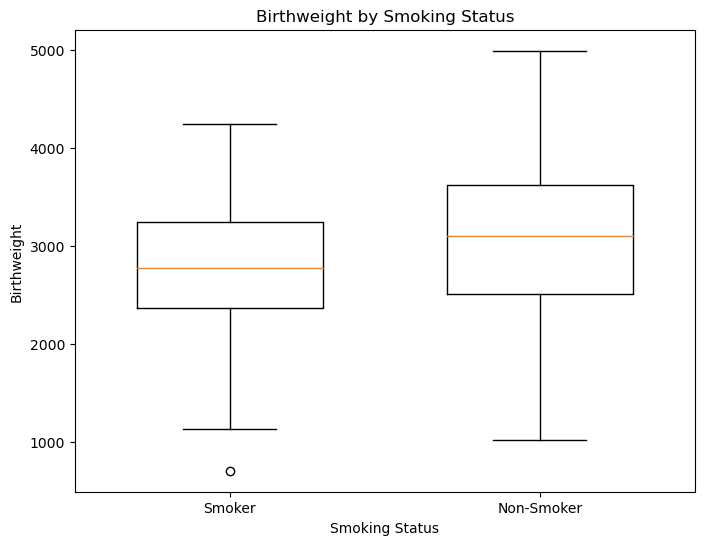

In [5]:
# 圖形大小
plt.figure(figsize=(8, 6)) 

plt.boxplot(birthwt[birthwt['smoke'] == 1]['bwt'], positions=[1], widths=0.6)
plt.boxplot(birthwt[birthwt['smoke'] == 0]['bwt'], positions=[2], widths=0.6)

# 設置坐標軸標籤和標題
plt.xlabel('Smoking Status')
plt.ylabel('Birthweight')
plt.title('Birthweight by Smoking Status')

# 設置 x 軸刻度標籤
plt.xticks([1, 2], ['Smoker', 'Non-Smoker'])
plt.show()

我們可以把有抽菸的媽媽找出來

In [6]:
birthwt[birthwt['smoke'] == 1]['bwt'].describe()

count      74.000000
mean     2771.918919
std       659.634867
min       709.000000
25%      2370.500000
50%      2775.500000
75%      3245.750000
max      4238.000000
Name: bwt, dtype: float64

In [7]:
np.sqrt(np.var(birthwt[birthwt['smoke'] == 1]['bwt']))  # 分母為 74 非 73

655.1627146099261

計算不同群的統計摘要

In [8]:
# 使用 groupby() 函數按照 'smoke' 變量分組，並計算描述性統計量
birthwt.groupby('smoke')['bwt'].describe()

,count,mean,std,min,25%,50%,75%,max
smoke,,,,,,,,
0,115.0,3055.695652,752.656607,1021.0,2509.0,3100.0,3621.50,4990.0
1,74.0,2771.918919,659.634867,709.0,2370.5,2775.5,3245.75,4238.0


+ Pearson's chi-square test
+ 列聯表中變量獨立性的卡方檢驗
+ 自由度：（行數 – 1）*（列數 – 1）
+ [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

In [9]:
# import scipy.stats as stats

stat, p, dof, expected = stats.chi2_contingency(cross_tab)
print("卡方值：", stat)
print("P 值：", p)
print("df：", dof,"\n","預期頻率：", "\n", expected)

卡方值： 4.235928545602459
P 值： 0.03957696932523243
df： 1 
 預期頻率： 
 [[79.1005291 35.8994709]
 [50.8994709 23.1005291]]


由報表的 X-squared 值，可以計算 Cramer’s V：

$$V = \sqrt{\frac{\chi^2}{n\; min(r-1,c-1)}}\;,其中\; n\; 為表格計數總和, r, c \;分別為橫列數與直行數。$$

若是 2x2 的表格，由列聯表各類別的個數，也可以計算樣本勝算比。<br>
勝算是 $o = \frac{p}{1−p}，其中\;p\;為感興趣的樣本比例。$

由上述列聯表的結果，我們可以算出<br>
當媽媽沒有抽菸的寶寶中，體重輕 (low=1) 的比例為 p1 = 29/(86+29) = 0.25，<br>
然而若是媽媽抽菸，其比例為 p2 = 30/(44+30) = 0.41。

體重輕的寶寶中兩群的勝算分別為 $o_1 = \frac{0.25}{(1−0.25)} = 0.33\;，\; o_2 = \frac{0.41}{(1−0.41)} = 0.69。$<br>
所以勝算比為 $OR_{21} = \frac{o_2}{o_1} = \frac{0.69}{0.33} = 2.1$，這代表當媽媽在懷孕的時候抽菸有 2.1 倍高的勝算會有體重輕的寶寶。

## 連續變數和類別型變數的關係
若對類別型變數和連續變數的關係感興趣，當樣本數較小時，我們會透過點圖觀察連續變數在不同水準的分佈狀態。<br>
以下以 R 中 MASS 套件的 cabbages 為例：

In [10]:
cabbages = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\13_回歸分析\cabbages.csv")
cabbages

,Cult,Date,HeadWt,VitC
0,c39,d16,2.5,51
1,c39,d16,2.2,55
2,c39,d16,3.1,45
3,c39,d16,4.3,42
4,c39,d16,2.5,53
5,c39,d16,4.3,50
6,c39,d16,3.8,50
7,c39,d16,4.3,52
8,c39,d16,1.7,56
9,c39,d16,3.1,49


+ 繪圖，因子變數選擇「Cult」，反應變數選擇「VitC」

In [11]:
factor_var = 'Cult'  
response_var = 'VitC' 

grouped = cabbages.groupby(factor_var)[response_var].apply(list)
grouped

Cult
c39    [51, 55, 45, 42, 53, 50, 50, 52, 56, 49, 65, 5...
c52    [58, 55, 67, 61, 67, 68, 58, 63, 56, 72, 52, 7...
Name: VitC, dtype: object

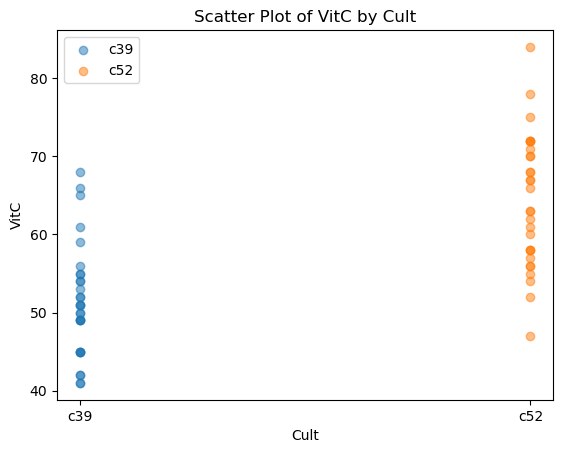

In [12]:
for group, data in grouped.items():
    plt.scatter([group] * len(data), data, label=group, alpha=0.5)

plt.xlabel(factor_var)
plt.ylabel(response_var)
plt.title('Scatter Plot of {} by {}'.format(response_var, factor_var))
plt.legend()
plt.show()

由散佈圖，我們也可以看出在 c52 時 VitC 值整體分佈較 c39 高

+ 另一種方式是由盒鬚圖比較，選擇「VitC」作為變數，群組變數選擇「Cult」

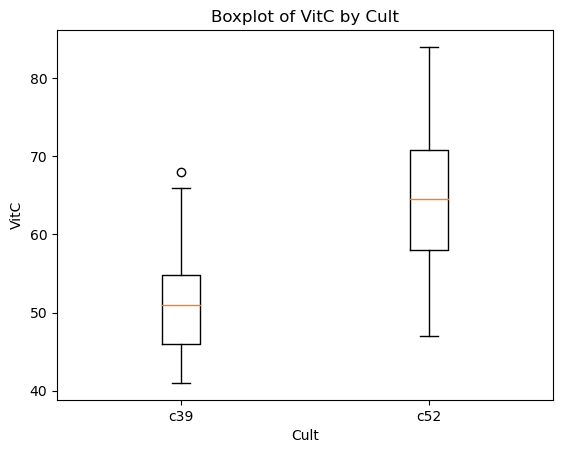

In [13]:
plt.boxplot(grouped.values, labels=grouped.index)
plt.xlabel(factor_var)
plt.ylabel(response_var)
plt.title('Boxplot of {} by {}'.format(response_var, factor_var))
plt.show()

由盒鬚圖，我們可以看出在 c52 時 VitC 值整體分佈較 c39 高，盒鬚圖的優點在於除了最大最小值外，還可以看出三個四分位數的位置。

+ 我們亦可看不同類別的數值摘要：

In [14]:
cabbages.groupby(factor_var)[response_var].describe()

,count,mean,std,min,25%,50%,75%,max
Cult,,,,,,,,
c39,30.0,51.5,7.123298,41.0,46.0,51.0,54.75,68.0
c52,30.0,64.4,8.455156,47.0,58.0,64.5,70.75,84.0


由數值摘要，我們可以從數值上看出各個統計指標的差異有多少。

+ 或者，我們也可看不同類別的平均數圖：
+ 條狀圖，因子變數選擇「Cult」，反應變數選擇「VitC」

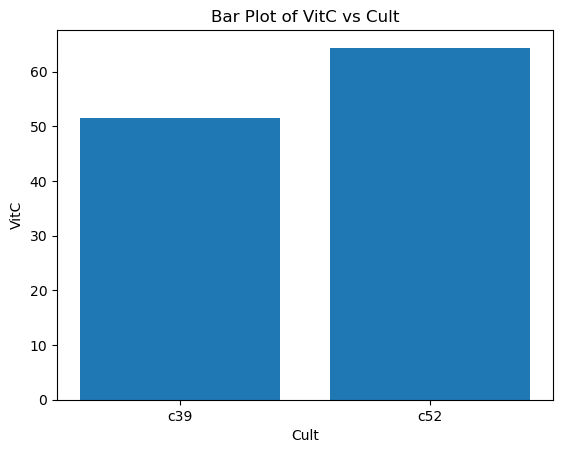

In [15]:
# 按因子變量分組，併計算反應變量的平均值
grouped = cabbages.groupby(factor_var)[response_var].mean()

plt.bar(grouped.index, grouped.values)
plt.xlabel(factor_var)
plt.ylabel(response_var)
plt.title('Bar Plot of {} vs {}'.format(response_var, factor_var))
plt.show()

由條狀圖，我們可以看出在 c52 時 VitC 平均值較 c39 高

對相關性的摘要統計量，一般會用變異數分析中的
$$R^2 = \frac{組間差異平方和}{總體差異平方和} = 1 - \frac{組內差異平方和}{總體差異平方和}$$

## 連續變數間的關係
### 探討兩變數的關係
以下以 R 中 mfp 套件中的 bodyfat 為例，此資料包含 252 名男性的身高、體重等多個解釋變量以及體脂百分比作為反應變量。

In [16]:
bodyfat = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\13_回歸分析\bodyfat.csv")
bodyfat

,case,brozek,siri,density,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
0,1,12.6,12.3,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,6.1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,25.3,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,10.4,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,28.7,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,248,11.5,11.0,1.0736,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,249,32.3,33.6,1.0236,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,250,28.3,29.3,1.0328,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,251,25.3,26.0,1.0399,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


我們先探討 siri 和 abdomen 兩變數的關係。<br>
其中 siri 為體脂百分比，其計算方程式為 siri = 495/ density - 450；abdomen 代表腹圍，單位為公分。

+ 由於二者均為連續變數，可由散佈圖觀察二者的關係：
+ x 變數選擇 abdomen，y 變數選擇 siri

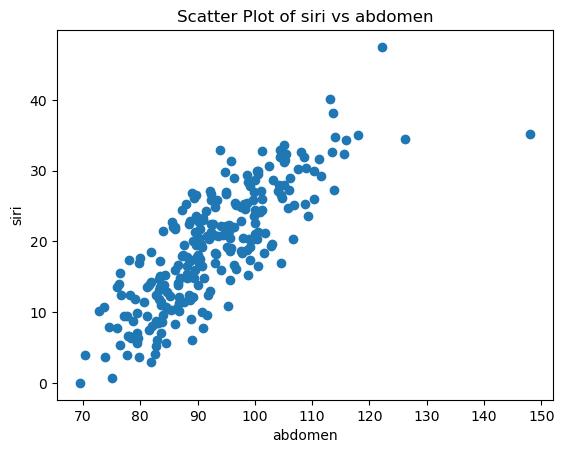

In [17]:
x_var = 'abdomen' 
y_var = 'siri'

plt.scatter(bodyfat[x_var], bodyfat[y_var])
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatter Plot of {} vs {}'.format(y_var, x_var))
plt.show()

由散佈圖可以發現，腹圍越大的男人，其體脂百分比越高。二者呈現正向的線性關係。

+ **小提醒**：在這種情況下，這種關係只是一種關聯，不應被視為因果關係，因為資料來自觀察性的研究

### 計算變數的相關係數
考慮一組成對的值 $(x_1, y_1),(x_2, y_2),...,(x_n, y_n)$，在這種資料中，皮爾森相關係數為 :

$$r_{xy} = \frac{\sum^n_{i=1}(x_i - \bar x)(y_i - \bar y)}{(n-1)S_x S_y} = \frac{V_{xy}}{S_x S_y}$$

其中 $\bar x \;為\; x \;的樣本平均，s_x \;為\; x\; 的樣本標準差\;, V_{xy}\; 為樣本的共變異數。$

+ 相關係數

In [18]:
correlation = bodyfat[x_var].corr(bodyfat[y_var])
print("相關係數：", correlation)

相關係數： 0.8134322847810496


+ 相關矩陣

In [19]:
correlation_matrix = bodyfat[['abdomen', 'siri']].corr()
correlation_matrix

,abdomen,siri
abdomen,1.000000,0.813432
siri,0.813432,1.000000


相關矩陣的第 i 列第 j 行的值代表變數 i 和變數 j 的相關係數，絕對值越靠近 1 代表相關性越高。
+ **小提醒**：相關矩陣為對稱矩陣，$r_{xy} = r_{yx}$

### 探討一群變數間的關係
若是要同時觀察許多變數間兩兩的關係：
+ 散佈矩陣圖，選擇變數 abdomen、height、weight、age

In [20]:
correlation_matrix = bodyfat[['abdomen', 'height', 'weight', 'age']].corr()
correlation_matrix

,abdomen,height,weight,age
abdomen,1.000000,0.087813,0.887995,0.230409
height,0.087813,1.000000,0.308279,-0.171645
weight,0.887995,0.308279,1.000000,-0.012746
age,0.230409,-0.171645,-0.012746,1.000000


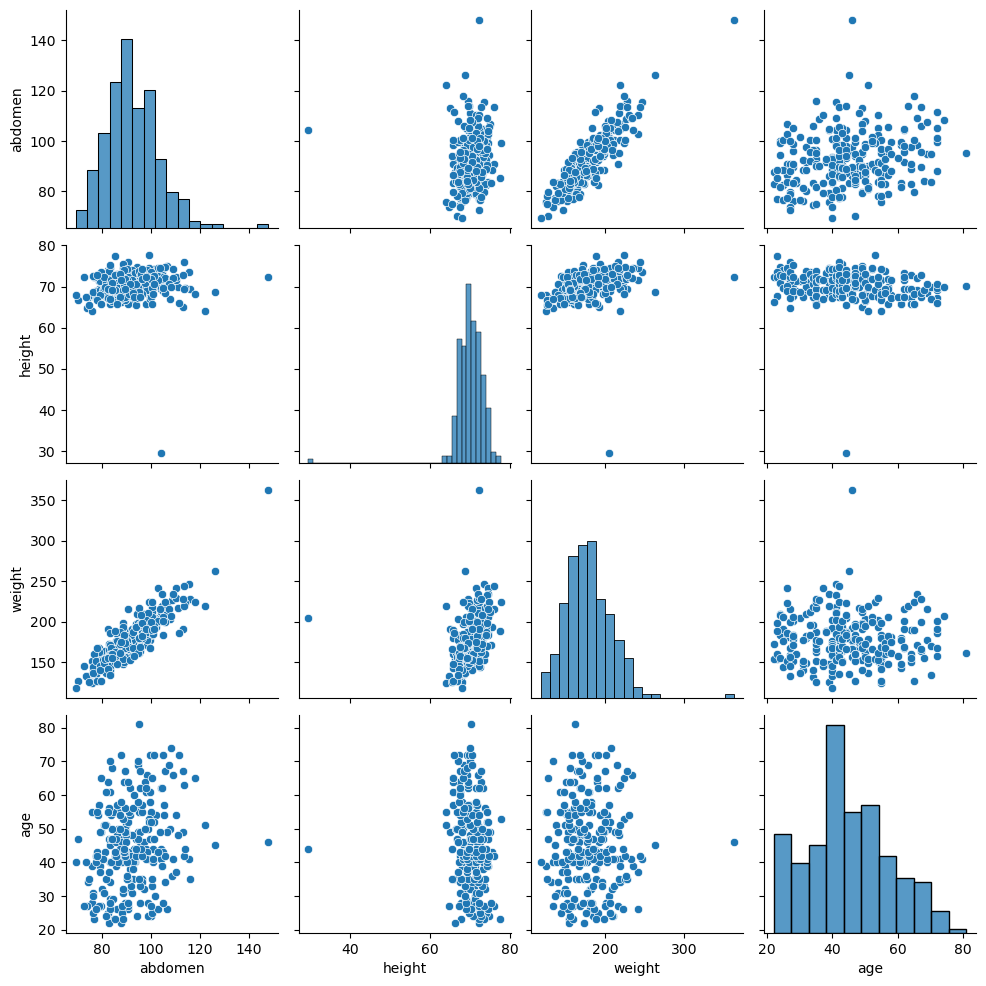

In [21]:
# import seaborn as sns

variables = ['abdomen', 'height', 'weight', 'age']

sns.pairplot(data=bodyfat[variables])
plt.show()

由散佈矩陣圖，我們可以觀察變數間的關係，還有變數各自的直方圖。

# 簡單線性迴歸


## 迴歸線和殘差
除了散佈圖觀察變數相關，我們有時希望透過一個 （解釋） 變數 $X$ 描述另一個 （反應） 變數 $Y$，亦即建立迴歸的關係。<br>
簡單線性迴歸的迴歸線為 :

$$\hat y = \alpha + \beta x$$

解釋變數和反應變數的線性關係透過斜率 $β$ 與截距 $α$ 描述。<br>
當解釋變數增加一單位，我們期望反應變數改變 $β$ 單位。

我們透過觀測到的值以及估計值的差，評估我們的迴歸線是否合理，並將兩者的差異其稱作殘差，記為 $e_i$。

$$對於每一個\; i\;，\;e_i = y_i − \hat y_i$$

另外，計算整體的差異用 Residual Sum of Squares：

$$SSE = ∑_{i=1}^n e^2_i\;,\;n 為樣本數$$

## β 的信賴區間


若資料符合後面關於迴歸分析的模型假設，則估計值 $b$ 的抽樣分布有

$$ \frac{b−β}{\sqrt{Var(b)}} \sim t(n−2)$$

欲知 $β$ 的信賴區間，其概念和找母體平均的信賴區間的方式相似。<br>
首先需求算估計值的標準差，將其表示為 $\sqrt{Var(b)} = SE_b$；
再來，需要給一個信心水準 $c$，並找出其相對應的 $t_{crit}$。<br>
如此即可創造一個 $β$ 的信賴區間如下：

$$[b − t_{crit} \times SE_b\;,\;b + t_{crit} \times SE_b]$$

在簡單線性迴歸模型中，$SE_b$ 公式為

$$SE_b = \frac{\sqrt{SSE/(n−2)}}{∑_{i=1}^n (x_i − \bar x)^2}\;,\;x_i \;為解釋變數的觀測值\;，\; \bar x \;為樣本平均$$

## 假設檢定
若想檢定解釋變數與反應變數間有沒有線性關係，我們的虛無假設可以寫成 $H_0 : β = 0$。<br>
檢定統計量為 :

$$t^∗ = \frac{b}{SE_b}$$

接著我們計算在虛無假設下，關於 $t^∗$ 的 $p-value$。

$$if\; H_A\; :\; β < 0\; ,\; p-value = P(T ≤ t^∗)\;,$$
$$if\; H_A\; :\; β > 0\; ,\; p-value = P(T ≥ t^∗)\;,$$
$$if\; H_A\; :\; β ≠ 0\; ,\; p-value = 2 \times P(T ≥ |t^∗|)\;,$$

其中 $T$ 為自由度為 $n − 2$ 的 $t$ 分佈。

## 適合度
在配適迴歸線之前反應變數的總變異 Total sum of Squares (SST) 為

$$SST = ∑_{i=1}^n (y_i − \bar y)^2$$

而 $\frac{SSE}{SST}$ 則可以顯示模型不能解釋的總變異的比例，相反地，$1 − \frac{SSE}{SST}$ 則為模型可以解釋的比例，稱作 $R^2$。

注意這裡的 $R^2$ 公式與前面變異數分析的 $R^2$ 其實是一樣的。

## 模型假設和診斷
線性模型的統計推論建立在數個假設之上，當違反假設的時候會導致錯誤的結論。

### 第一個假設：線性
在線性模型的假設中，最重要的是解釋變數和反應變數的關係是線性。而是否為線性的關係，我們可以從散佈圖簡單看出。

### 第二個假設：獨立性
另一個重要的假設是觀測值是獨立的。<br>
如果我們使用簡單的隨機抽樣來選擇彼此不相關的個體，而且沒有從同一個體獲得多個觀察結果，那麼通常就滿足這項假設。<br>

不滿足獨立假設的例子：在評估不同飲食對血壓的影響時，我們可能會在一段時間內反覆對每個人進行多次血壓測量。<br>
對於此類數據，隨著時間的推移獲得多個觀測資料時，我們通常使用縱向模型來討論。

### 第三個假設：變異數為常數和常態性
線性迴歸模型還涉及一些關於反應變量 $Y$ 的機率分佈的假設，由於

$$Y = α + βX + ϵ\;,\;ϵ \sim N(0,σ^2)$$
 
其中 $σ^2$ 是未知的。這個假設的意義是，該參數的值不會隨解釋變量的不同而改變，例如，對於 $x=10$ 和 $x=100$，$σ^2$ 保持不變。<br>
這也意味著我們期望無論解釋變量的值如何，迴歸線周圍的反應變量的實際值的變化範圍保持不變。<br>
這一般也稱作變異數為常數的假設。我們可以由後面介紹的基本診斷圖檢查這個假設。<br>

當變異數為常數的假設不成立時，我們有時可以使用反應變量的簡單轉換使變異數趨於穩定。<br>
例如，我們可以使用 $\sqrt{Y}$ (通常當 $Y$ 是計數變量時) 或迴歸模型中的 $log Y$ 來代替 $Y$。<br>
另一種策略則是使用加權最小平方法 (這裡不討論) 替代標準最小平方法。

## 利用 Python 做簡單線性迴歸


從 R 中 datasets 套件讀取 women 資料，裡面包含兩個變數 weight 和 height，單位分別為磅和英吋。

In [22]:
women = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\13_回歸分析\women.csv")
women

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


### 觀察資料關係與建模
**具有最小平方線的散佈圖<br>**
+ x 變數選擇 weight，y 變數選擇 height

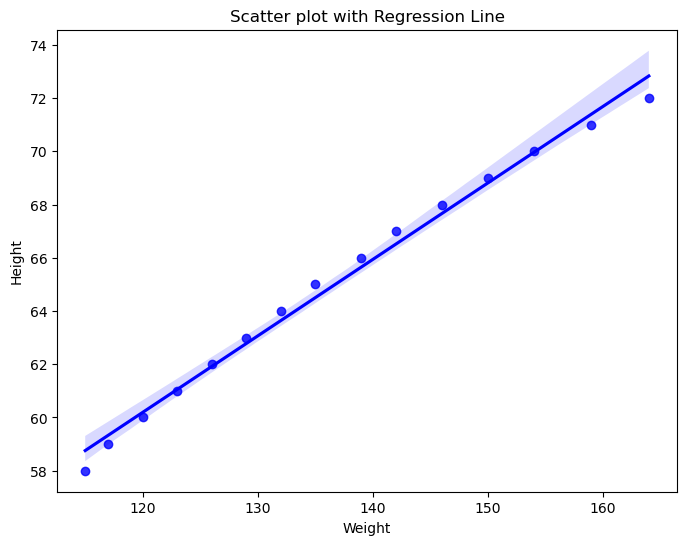

In [23]:
plt.figure(figsize=(8, 6))

# sns.scatterplot(x='weight', y='height', data=women)
sns.regplot(x='weight', y='height', data=women, scatter=True, color='blue')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Scatter plot with Regression Line')
plt.show()

**各別盒鬚圖**

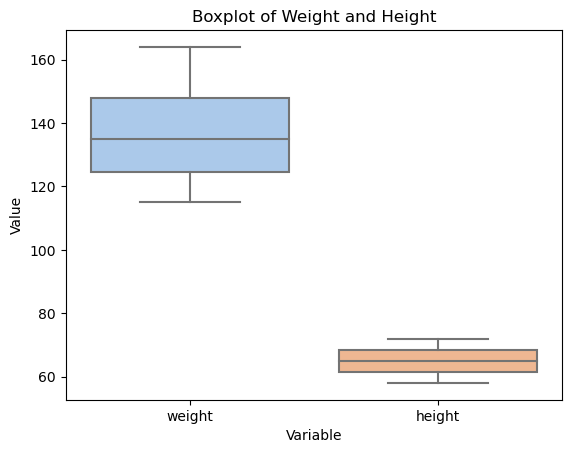

In [24]:
sns.boxplot(data=women[['weight', 'height']], palette='pastel')

plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of Weight and Height')
plt.show()

### 建立迴歸模型
+ 反應變數 height
+ 解釋變數 weight

In [25]:
# import statsmodels.api as sm

X = women['weight']
y = women['height']

# 添加常數項
X = sm.add_constant(X)

# 擬合模型
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           1.09e-14
Time:                        02:34:54   Log-Likelihood:                -7.8974
No. Observations:                  15   AIC:                             19.79
Df Residuals:                      13   BIC:                             21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7235      1.044     24.645      0.0

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


由此可發現，截距項的估計值為 25.7235，weight 的估計值為 0.2872。<br>
模型的 R-square 相當高，這代表模型的解釋度很好。

若是要由模型來預測身高，則可以將體重的值帶入迴歸式

$$height = 25.7235 + 0.2872 \times weight$$

如下即顯示體重為 120 (磅) 預測的身高為 60.19336294 (英吋)

In [26]:
results.predict([1, 120])

array([60.19336294])

predict() 函數接受一個包含常數項和解釋變量值的數組作為輸入。<br>
在這個示例中，我們手動創建了一個包含常數項（1）和新體重值（120）的列表

+ 散佈圖跟迴歸線

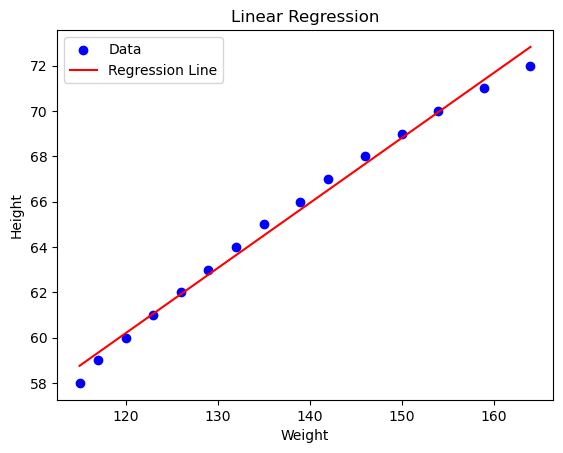

In [27]:
# 提取係數
intercept = results.params[0]
slope = results.params[1]

# 散佈圖跟迴歸線
plt.scatter(X['weight'], y, color='b', label='Data')
plt.plot(X['weight'], intercept + slope * X['weight'], color='r', label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Weight')
plt.ylabel('Height')

# 顯示圖例
plt.legend()

plt.show()

### 基本診斷圖
1. 殘差與擬合值的關係圖（Residual vs Fitted Plot）：
```
繪製殘差（觀測值與預測值之差）與擬合值之間的散點圖。
該圖可以幫助評估殘差與擬合值之間是否存在非線性關係或異方差性。
```

2. 殘差的正態性圖（Residual Normality Plot）：
```
繪製殘差的頻率直方圖和正態概率圖（QQ 圖），以評估殘差是否近似符合正態分佈。
如果殘差在大部分區間內近似符合正態分佈，則說明模型對數據的擬合較好。
```

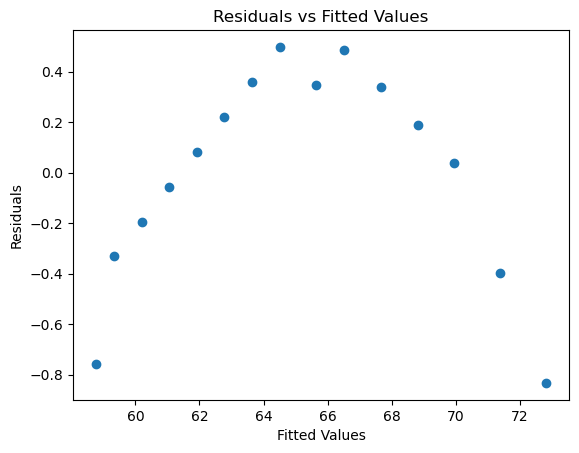

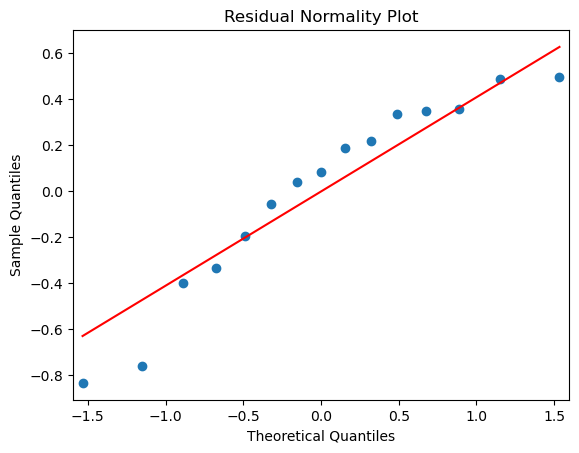

In [28]:
# 殘差
residuals = results.resid

# 殘差和配適值的關係
plt.scatter(results.fittedvalues, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

# 殘差是否滿足常態
sm.qqplot(residuals, line="s")
plt.title("Residual Normality Plot")
plt.show()

3. 殘差與預測值的散佈圖（Standardized Residual vs Predicted Plot）：
```
繪製殘差與預測值之間的散點圖，以檢查殘差是否在預測值的各個範圍內均勻分佈。
如果殘差在不同預測值範圍內均勻分佈，則說明模型對數據的擬合較好。
```

4. 槓桿-殘差圖（Leverage-Residual Plot）：
```
繪製槓桿值與標準化殘差之間的關係圖，以檢查是否存在離群值或潛在的高槓桿點。
高槓桿點可能對模型的擬合和預測結果產生影響。
```
+ [statsmodels.graphics.regressionplots.influence_plot](https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.influence_plot.html)

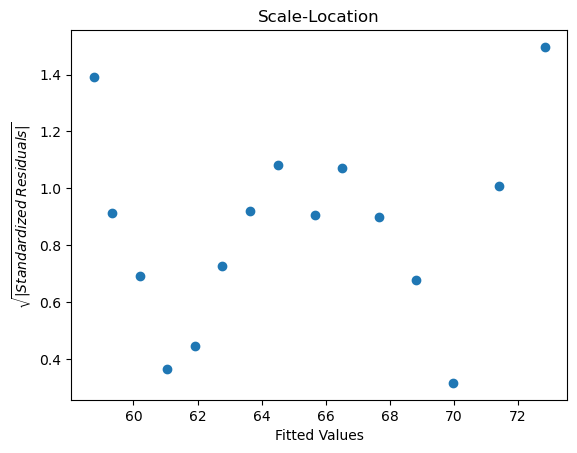

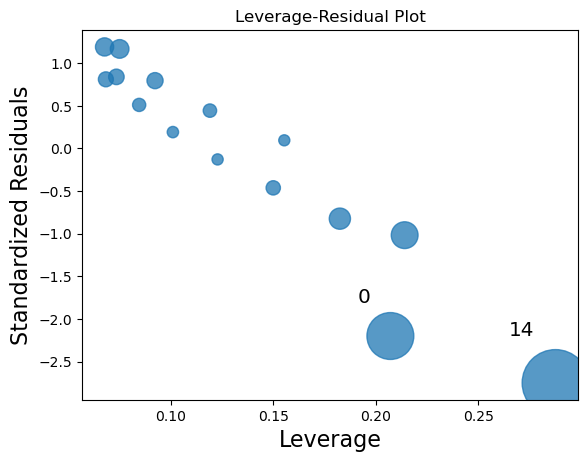

In [29]:
# 殘差是否沿預測範圍均勻散佈
# 標準化殘差
standardized_residuals = results.get_influence().resid_studentized_internal

plt.scatter(results.fittedvalues, np.sqrt(np.abs(standardized_residuals)))
plt.xlabel("Fitted Values")
plt.ylabel("$\sqrt{|Standardized \;Residuals|}$")
plt.title("Scale-Location")
plt.show()

# 殘差有無槓桿點
sm.graphics.influence_plot(results)
plt.xlabel("Leverage")
plt.ylabel("Standardized Residuals")
plt.title("Leverage-Residual Plot")
plt.show()

+ 此模型殘差和配適值呈現一個二次關係，這不滿足假設
+ 模型的殘差大致滿足常態的性質，因為點大多落在線附近

### 假設檢定
+ 檢定斜率是否為 1
+ [statsmodels.regression.linear_model.OLSResults.t_test](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.t_test.html)
+ 提供的檢定方式很有彈性，可放 { array, str, tuple }

In [30]:
# 進行斜率為 1 的假設檢定
hypotheses = 'weight = 1'
t_test = results.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.2872      0.008    -93.930      0.000       0.271       0.304


由 p - value 來看，我們可以拒絕斜率為 1 的虛無假設

# 多元線性迴歸
## 利用 Python 做多元線性迴歸


In [31]:
birthwt = pd.read_csv(r"C:\Users\user\Desktop\R 改 python\13_回歸分析\birthwt.csv")
birthwt

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


### 多元線性模型 : bwt～age + smoke

In [32]:
X = birthwt[['age', 'smoke']]
y = birthwt['bwt']

# 常數項
X = sm.add_constant(X)

# 擬合模型
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     4.177
Date:                Tue, 18 Jul 2023   Prob (F-statistic):             0.0168
Time:                        02:34:56   Log-Likelihood:                -1509.4
No. Observations:                 189   AIC:                             3025.
Df Residuals:                     186   BIC:                             3035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2791.2243    240.950     11.584      0.0

透過摘要模型，我們可以得到估計的迴歸係數，因此，我們可以由以下式子估計出生體重 :

$$\hat{bwt} = 2791 + 11 \times age − 278 \times smoke$$

此外，亦可得到標準誤、t-scores 和 p-value，最後，由 Adjusted R-squared 看模型的解釋度為 0.03

根據此模型，當媽媽的抽菸狀況相同，我們期待寶寶的出生體重隨著媽媽的年齡增加一年，增加11克。<br>
若兩個解釋變量同時改變，它們在反應變量的整體影響是它們各自效果的總和。<br>
例如，如果我們將媽媽的年齡從 27 歲改為 28 歲，並將抽菸狀況從 0 改為 1，寶寶的出生體重的預期變化為 11 + (−278) = −267。

在迴歸係數的標準誤中 $SE_{b1} = 10，SE_{b2} = 107$，假設我們好奇 $β_1\;和 \;β_2\; 的\; 95\% \;信賴區間。$

首先，要找 0.95 的信心水準下，擁有自由度 df = 189 − (2 + 1) = 186 的 t 分佈，$t_{crit}$

In [33]:
df = 186                               # 自由度
alpha = 0.05                           # 信心水準

t_value = stats.t.ppf(1 - alpha/2, df) # 分位數
t_value

1.9728001139921347

故我們可以得到 $t_{crit} = 1.97$

因此，我們可以得到 age 的 95% 信賴區間為 :

$$[11 − 1.97 \times 10 \;,\; 11 + 1.97 \times 10] = [−8 \;,\; 31]$$

而 smoke 的 95% 信賴區間為 :

$$[−278 − 1.97\times 107 \;,\; −278 + 1.97 \times 107] = [−489 \;,\; −67]$$

這亦可由以下操作得到

In [34]:
results.conf_int(alpha=0.05)

,0,1
const,2315.878915,3266.569709
age,-8.204380,30.783596
smoke,-489.419696,-67.292563


我們觀察估計 age 的迴歸係數在 95% 信賴區間中有包含 0，即虛無假設的值。<br>
另外，該 p - value 為 0.255，故在 $α = 0.05$ 下，不能拒絕虛無假設。<br>
然而，在估計 smoke 的迴歸係數中，該 p - value 為 0.01，故在 $α = 0.05$ 下，即可拒絕虛無假設。

## 解釋變數間可能會有影響的例子
我們以 R 中 mfp 套件中 bodyfat 的資料為例 ：<br>
底下我們比較兩個模型，第一個模型的解釋變量僅考慮 height，第二個模型的解釋變量考慮 height 和 abdomen，而二者的反應變量均為 siri
+ 底下是兩個模型的摘要：

In [35]:
# 第一個模型的解釋變量僅考慮 height
X1 = bodyfat[['height']]
y1 = bodyfat['siri']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
print(results1.summary(), "\n")

# 第二個模型的解釋變量考慮 height 和 abdomen
X2 = bodyfat[['height', 'abdomen']]
y2 = bodyfat['siri']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   siri   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.019
Date:                Tue, 18 Jul 2023   Prob (F-statistic):              0.157
Time:                        02:34:56   Log-Likelihood:                -891.43
No. Observations:                 252   AIC:                             1787.
Df Residuals:                     250   BIC:                             1794.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.4945     10.110      3.313      0.0

由第一個模型的結果，我們可以看出在 $α = 0.1$ 下，height 變量是不顯著的。<br>
但是在第二個模型中，我們可以看到 hight 和 abdomen 均為顯著。

這項結果表明，**一個解釋變量的重要性和顯著性可能受到模型中其他解釋變量的存在或不存在影響**。<br>
我們對反應變量和解釋變量關係的推斷，可能取決於我們在模型中包含的其他變量。<br>
因此，當我們使用多元線性迴歸模型進行統計推斷時，應該非常仔細地選擇一組解釋變量。

## 多元迴歸需要更多診斷
+ [MLmuse：相關性和共線性——它們如何建立或破壞模型](https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a)

## 多元迴歸的變數選取
沒有任何概念時
+ [Python 中的逐步回歸教程](https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922)
+ [python lasso回归算法之回归实操](https://zhuanlan.zhihu.com/p/346232512)

有幾個候選的模型，彼此互相包含時
+ [GLM：分層線性回歸](https://www.pymc.io/projects/docs/en/v3/pymc-examples/examples/generalized_linear_models/GLM-hierarchical.html)

## 進階程式
我們討論模型的變數有交互作用項，即

$$Y = α + β_1 X_1 + β_2 X_2 + β_{12} X_1X_2 + ϵ$$

其中，$β1$ 和 $β2$ 是主效應，$β_{12}$ 是交互效應。

以下利用 R 中 MASS 套件內的 birthwt 資料為例 ：

In [36]:
birthwt

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600
...,...,...,...,...,...,...,...,...,...,...
184,1,28,95,1,1,0,0,0,2,2466
185,1,14,100,3,0,0,0,0,2,2495
186,1,23,94,3,1,0,0,0,0,2495
187,1,17,142,2,0,0,1,0,0,2495


+ 使用 * 符號來表示交互作用項

In [37]:
# 創造交互項
birthwt['smoke_age'] = birthwt['smoke'] * birthwt['age']

# 模型
X = birthwt[['smoke', 'age', 'smoke_age']]
y = birthwt['bwt']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bwt   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.577
Date:                Tue, 18 Jul 2023   Prob (F-statistic):            0.00407
Time:                        02:34:56   Log-Likelihood:                -1506.8
No. Observations:                 189   AIC:                             3022.
Df Residuals:                     185   BIC:                             3035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2406.0580    292.190      8.235      0.0

透過摘要模型，我們可以估計迴歸係數。因此，我們可以由以下式子估計出生體重。

$$\hat{bwt} = 2406 + 28 \times age + 798\times smoke − 47\times age*smoke$$
 
此外，亦可由 Adjusted R-squared 看模型的解釋度為 0.054，相較於沒有交互作用項的模型，此模型的解釋度提高了一點。

但是對於這個模型，雖然抽菸的主效應是 798，<br>
但我們不能不管媽媽的年齡，就將此解釋為我們對抽菸媽媽 (smoke=1) 與不抽菸媽媽 (smoke=0) 寶寶出生體重預期增加的估計。<br>
因為模型有包含抽菸與年紀的交互作用項，故此時需同時討論媽媽有無抽菸，與其年紀。

討論在媽媽年紀為 23 歲時，我們可以討論沒有抽菸的媽媽，其寶寶的出生體重為 ：

$$\hat{bwt} = 2406 + 28 \times 23 + 798\times 0 − 47\times 23 \times 0 = 3050$$
 
也可以討論有抽菸的媽媽，其寶寶的出生體重為 ：

$$\hat{bwt} = 2406 + 28 \times 23 + 798\times 1 − 47\times 23\times 1 = 2767$$
 
在媽媽年紀為 23 歲時，有抽菸的媽媽，其寶寶的出生體重比沒抽菸的減少 3050 − 2767 ＝ 283 克
+ 小提醒：估計值會因媽媽年紀不同而改變

+ 由 dir() 可以看出模型輸出包含哪些資訊

In [38]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [39]:
results.fittedvalues[:5]

0    2932.954161
1    3321.193456
2    2827.422121
3    2808.581585
4    2865.103194
dtype: float64

In [40]:
results.resid[:5]

0   -409.954161
1   -770.193456
2   -270.422121
3   -214.581585
4   -265.103194
dtype: float64

像是 .fittedvalues 代表我們的配適值，.resid 代表我們的殘差，即為觀測值和配適值的差。

# 補充:字串和公式
### 創造公式
當我們開始處理模型，可能會需要創造公式的技巧
+ 創造一個模型，反應變數為 $y$，解釋變數為 $x_1、x_2$和 $x_3$

In [41]:
response = "y"
explain = ["x1", "x2", "x3"]

formula = response + " ~ " + " + ".join(explain)
print(formula)

y ~ x1 + x2 + x3


將模型指定為一個字串變數，則該變數即為公式

In [42]:
f = 'z ~ x + y' 
print(f)

z ~ x + y


# 補充:迴歸分析與變異數分析的關係
+ [迴歸也可以作差異分析](https://dasanlin888.pixnet.net/blog/post/439137325)

---